# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Customer Churn Prediction using Ensemble Models

A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

**DATA DESCRIPTION:** 

Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device
protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

**PROJECT OBJECTIVE:**

Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the painpoints and patterns of customer churn and will increase the focus on strategising
customer retention.

In [315]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

In [316]:
%matplotlib inline
sns.set(color_codes=True)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 1. Import Data 

In [317]:
churnData = pd.read_csv('TelcomCustomer-Churn.csv')
churnData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [318]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [319]:
churnData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Get a summary of types and value counts of all categories from category type columns

In [320]:
catCols = churnData.columns
catCols = catCols.drop('customerID').drop('tenure').drop('MonthlyCharges').drop('TotalCharges')
for col in catCols:
    print("\n---------------"+col+"------------\n")
    print(churnData[col].value_counts())


---------------gender------------

Male      3555
Female    3488
Name: gender, dtype: int64

---------------SeniorCitizen------------

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

---------------Partner------------

No     3641
Yes    3402
Name: Partner, dtype: int64

---------------Dependents------------

No     4933
Yes    2110
Name: Dependents, dtype: int64

---------------PhoneService------------

Yes    6361
No      682
Name: PhoneService, dtype: int64

---------------MultipleLines------------

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

---------------InternetService------------

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

---------------OnlineSecurity------------

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

---------------OnlineBackup------------

No                     3088
Y

In [321]:
# Shape and size of the dataframe
print("> Shape:",churnData.shape)
print("\n> Size:",churnData.size)

> Shape: (7043, 21)

> Size: 147903


In [322]:
# Column names
churnData.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [323]:
# Data types of the attributes
churnData.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 2. Data Cleaning

In [324]:
# drop user-id from data
churnData = churnData.drop(['customerID'],axis=1)

In [325]:
# convert TotalCharges to numeric-value column
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [326]:
# Convert to bins
churnData['MonthlyCharges'] = pd.cut(x=churnData['MonthlyCharges'], bins=[10, 30, 50, 70,90,110,130],labels=['1', '2', '3','4','5','6'])
churnData['tenure'] = pd.cut(x=churnData['tenure'], bins=[0, 10, 20, 30,40,50,60,70,80],
                    labels=['1', '2', '3','4','5','6','7','8'])
churnData['TotalCharges'] = pd.cut(x=churnData['TotalCharges'], bins=[0, 500, 1000, 2000,3000,4000,5000,6000,7000,8000,10000],
                    labels=['1', '2', '3','4','5','6','7','8','9','10'])

In [327]:
# convert all column values from String catergorical values to numerical categorical values.
#churnData[catCols] = churnData[catCols].apply(lambda col:pd.Categorical(col).codes)

In [328]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Transforming categorical variable to label encoded form
for col in catCols:
    churnData[col] = le.fit_transform(churnData[col])


In [329]:
# check for null value
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [330]:
# Remove the null values from the datset
churnData = churnData.dropna()

In [331]:
# sample from the dataset to view the above transformations
churnData.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,1,1,0
1,1,0,0,0,4,1,0,0,2,0,2,0,0,0,1,0,3,3,3,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,3,1,1
3,1,0,0,0,5,0,1,0,2,0,2,2,0,0,1,0,0,2,3,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,4,1,1
5,0,0,0,0,1,1,2,1,0,0,2,0,2,2,0,1,2,5,2,1
6,1,0,0,1,3,1,2,1,0,2,0,0,2,0,0,1,1,4,3,0
7,0,0,0,0,1,0,1,0,2,0,0,0,0,0,0,0,3,1,1,0
8,0,0,1,0,3,1,2,1,0,0,2,2,2,2,0,1,2,5,5,1
9,1,0,0,1,7,1,0,0,2,2,0,0,0,0,1,0,0,3,5,0


In [332]:
# re-check the data-type transformations done in earlier steps
churnData.dtypes

gender                 int32
SeniorCitizen          int64
Partner                int32
Dependents             int32
tenure              category
PhoneService           int32
MultipleLines          int32
InternetService        int32
OnlineSecurity         int32
OnlineBackup           int32
DeviceProtection       int32
TechSupport            int32
StreamingTV            int32
StreamingMovies        int32
Contract               int32
PaperlessBilling       int32
PaymentMethod          int32
MonthlyCharges      category
TotalCharges        category
Churn                  int32
dtype: object

# 3. Data Analysis

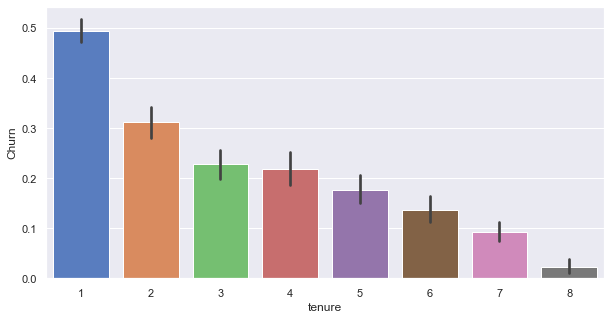

In [333]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='tenure', y='Churn', data=churnData, palette='muted')  # barplot

The category 1 (0-10) and 2 (10-20) shows the most churn followed by cat 4 (30-40). These customers must be offered additional services to retain them.

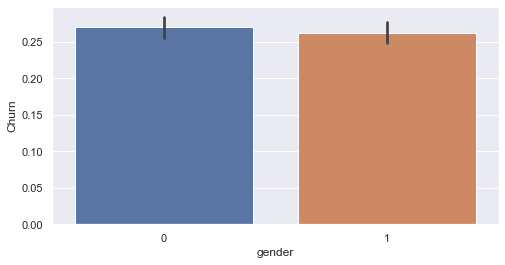

In [334]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="gender", y="Churn", data=churnData)

There is an equal gender distribution among churning rate.

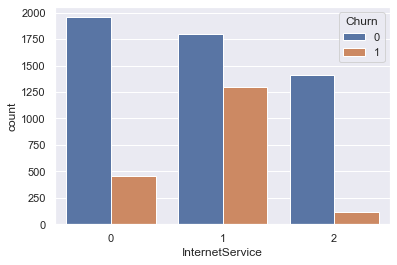

In [335]:
sns.countplot(x="InternetService", hue="Churn", data=churnData);

Those with a DSL internet connection is more likely to churn. Recommend migrating DSL customers to fiber optic cable.

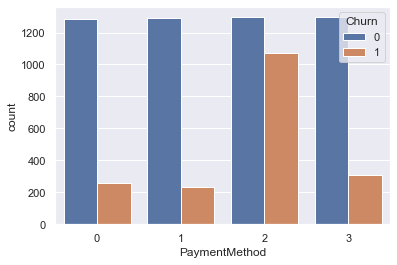

In [336]:
sns.countplot(x="PaymentMethod", hue="Churn", data=churnData);

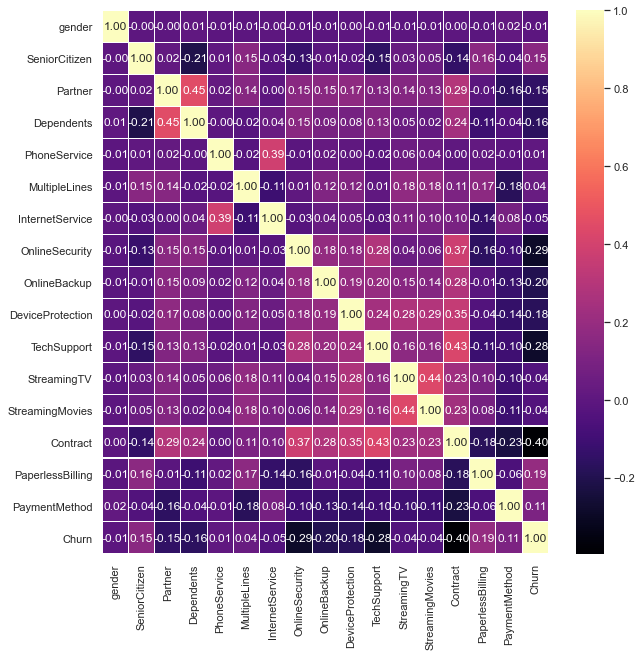

In [337]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(churnData.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

# 4. Data Pre-processing 

Check for class imbalance

In [338]:
churnData.groupby("Churn").agg({'Churn': 'count'})

,Churn
Churn,
0,5163
1,1869


The dataset is very imbalanced. Proceed to resample the dataset. Since, we have a sizeable number (1869) of churned customers, we can downsample the non-churned customers to the size of churned customers.

In [339]:
from sklearn.utils import resample

# Separate majority and minority classes
churn_yes = churnData[churnData.Churn == 1]
churn_no = churnData[churnData.Churn == 0]
print(f"Before down-sampling: \n{churnData.Churn.value_counts()}\n")

dsampled_churn_no = resample(churn_no, 
                                 replace=False,     # down-sample with replacement
                                 n_samples=1869,    # to match majority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
churnData = pd.concat([dsampled_churn_no, churn_yes])
 
# Display new class counts
print(f"After down-sampling: \n{churnData.Churn.value_counts()}")

Before down-sampling: 
0    5163
1    1869
Name: Churn, dtype: int64

After down-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [340]:
# segregate target and predictors
X = churnData.drop(['Churn'], axis=1)
y = churnData['Churn']

In [341]:
# split into train and test in ration 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [342]:
print(f"Shape of: X_train={X_train.shape} ; X_test={X_test.shape} ; y_train={y_train.shape} ; y_test={y_test.shape}")

Shape of: X_train=(2616, 19) ; X_test=(1122, 19) ; y_train=(2616,) ; y_test=(1122,)


In [343]:
def getConfusionMatrixAndAccuracy(model, test_pred):
    # evaluate accuracy
    print(f"{color.BOLD+color.PURPLE}Accuracy Score: {accuracy_score(y_test, test_pred)}")

    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues,
                                     normalize='true');
    disp.ax_.set_title("Confusion matrix for Churn Prediction")
    plt.grid(False)

### A. Apply decision tree classifier

In [344]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test)
test_pred = dt_model.predict(X_test)

Accuracy Score: 0.6524064171122995


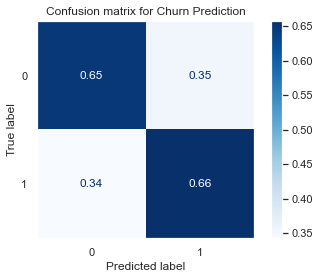

In [345]:
getConfusionMatrixAndAccuracy(dt_model, test_pred)

### B. Apply Random Forest Classifier

In [346]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred_randomForest = rfcl.predict(X_test)

Accuracy Score: 0.7370766488413547


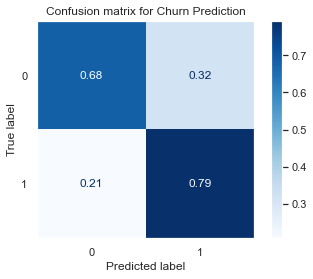

In [347]:
getConfusionMatrixAndAccuracy(rfcl, test_pred_randomForest)

### C. Apply Ada Boost Classifier

In [348]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
adaBoost = AdaBoostClassifier( n_estimators= 20)
adaBoost = adaBoost.fit(X_train, y_train)
test_pred_adaBoost = adaBoost.predict(X_test)

Accuracy Score: 0.7281639928698752


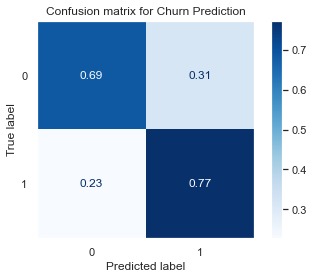

In [349]:
getConfusionMatrixAndAccuracy(adaBoost, test_pred_adaBoost)

### D. Apply Bagging Classifier

Accuracy Score: 0.6844919786096256


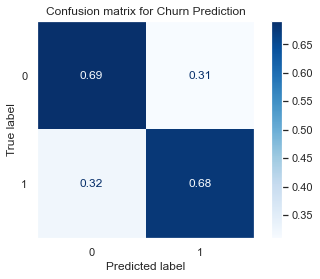

In [350]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred_bagging = bgcl.predict(X_test)
getConfusionMatrixAndAccuracy(bgcl, test_pred_bagging)

### E. Apply Gradient Boosting Classifier

Accuracy Score: 0.7228163992869875


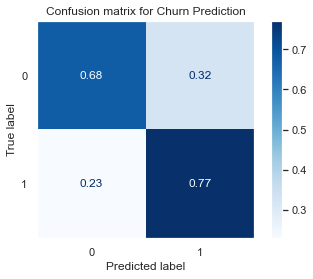

In [351]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred_gb = gbcl.predict(X_test)
getConfusionMatrixAndAccuracy(gbcl, test_pred_gb)

**Export the Random Forest Classifier with the best result**

In [352]:
import pickle
filename = 'Churning_Predictor.pkl'
pickle.dump(adaBoost, open(filename, 'wb'))

# 5. Conclusion

1. The best performing model is using the randomForest (overall 73 % accuracy). In which, when the model predicts that a customer might leave the service, it does so with a nearly 80% accuracy.
    - The dataset was cleaned to remove null values and convert to suitable types
    - Dataset was highly unbalanced among the 'Churned/non-churned' class of customers. Hence, downsampling was done to match the lower size of the unbalanced class.
    - MonthlyCharges, TotalCharges and tenure were converted as categorical values by binning them.
    - The dataset was divided into training and testing in ratio of 70:30
    - Various ensemble techniques such as entropy decision tree, Adaboost, randomforest, bagging, gradient boosting classifiers were used with various parameters.
    - Accuracy and confusion matrix of each was algorithm was printed to check the validity of the model.
    - RandomForest was found as the best model
2. The quality of dataset can be improved in the following respects
    - The dataset is very imbalanced. Need more data points on those customers who have left the service
    - Null/NaN values were found when the values were converted to numerical categories
    - The dataset should consistently have either all String categorical or Numerical Categorical. However, `SeniorCitizen` column had numerical category while others had string categorical values. Conviniently, Numerical categorical columns are preferred for applying data analysis.